In [1]:
# Import the required libraries and dependencies
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Store the NASDAQ data in a Pandas DataFrame
# Set the "Date" column as the Datetime Index.
df_nasdaq = pd.read_csv(
    "~/project_1/Resources/NASDAQ_Comp_HistoricalData_1715050466921.csv",
    index_col='Date',
    parse_dates=True
).dropna()

# Sort by ascending date
df_nasdaq = df_nasdaq.sort_values(by="Date", ascending=True)

# Review the first and last five rows of the DataFrame
display(df_nasdaq.head())
display(df_nasdaq.tail())

,Close/Last,Open,High,Low
Date,,,,
2014-05-06,4080.76,4128.22,4132.46,4080.76
2014-05-07,4067.67,4085.49,4091.03,4021.05
2014-05-08,4051.50,4053.28,4109.20,4039.91
2014-05-09,4071.87,4043.44,4071.87,4025.24
2014-05-12,4143.86,4092.84,4146.54,4092.09


,Close/Last,Open,High,Low
Date,,,,
2024-04-29,15983.08,16007.00,16021.49,15885.89
2024-04-30,15657.82,15920.89,15979.36,15655.67
2024-05-01,15605.48,15646.09,15926.22,15557.64
2024-05-02,15840.96,15758.11,15862.79,15604.73
2024-05-03,16156.33,16147.48,16204.71,16068.34


In [3]:
# Rename close column name
df_nasdaq.rename(columns={'Close/Last': 'NASDAQ Close'}, inplace=True)

In [4]:
# Create new df with just Close prices
df_nasdaq_close = df_nasdaq['NASDAQ Close']

<Axes: xlabel='Date'>

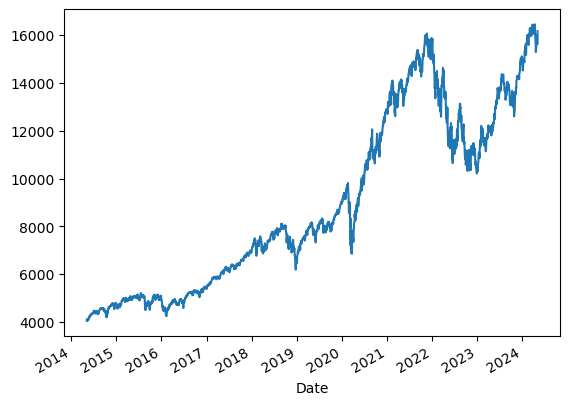

In [5]:
# Plot NASDAQ Close
df_nasdaq_close.plot()

In [6]:
# Store the S&P 500 data in a Pandas DataFrame
# Set the "Date" column as the Datetime Index.
df_sp500 = pd.read_csv(
    "~/project_1/Resources/SP500_HistoricalData_1715050201148.csv",
    index_col='Date',
    parse_dates=True
).dropna()

# Sort by ascending date
df_sp500 = df_sp500.sort_values(by="Date", ascending=True)

# Review the first and last five rows of the DataFrame
display(df_sp500.head())
display(df_sp500.tail())

,Close/Last,Open,High,Low
Date,,,,
2014-05-06,1867.72,1883.69,1883.69,1867.72
2014-05-07,1878.21,1868.53,1878.83,1859.79
2014-05-08,1875.63,1877.39,1889.07,1870.05
2014-05-09,1878.48,1875.27,1878.57,1867.02
2014-05-12,1896.65,1880.03,1897.13,1880.03


,Close/Last,Open,High,Low
Date,,,,
2024-04-29,5116.17,5114.13,5123.49,5088.65
2024-04-30,5035.69,5103.78,5110.83,5035.31
2024-05-01,5018.39,5029.03,5096.12,5013.45
2024-05-02,5064.20,5049.32,5073.21,5011.05
2024-05-03,5127.79,5122.78,5139.12,5101.22


In [7]:
# Rename close column name
df_sp500.rename(columns={'Close/Last': 'SP500 Close'}, inplace=True)

In [8]:
# Create new df with just Close prices
df_sp500_close = df_sp500['SP500 Close']

<Axes: xlabel='Date'>

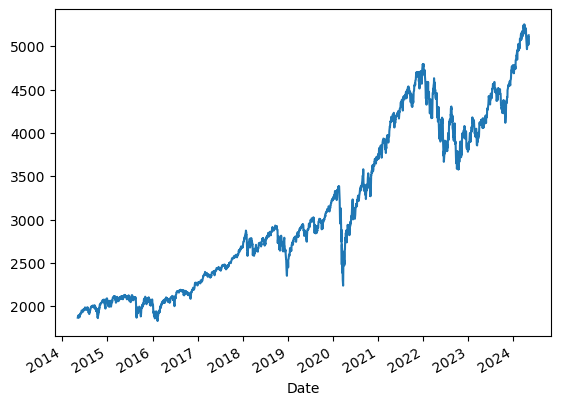

In [9]:
# Plot S&P 500 Close
df_sp500_close.plot()

In [10]:
# Concat NASDAQ and S&P 500 close dataframes
df_nasdaq_sp500_close = pd.concat([df_nasdaq_close, df_sp500_close], axis=1)

In [11]:
# Review the first and last five rows of the DataFrame
display(df_nasdaq_sp500_close.head())
display(df_nasdaq_sp500_close.tail())

,NASDAQ Close,SP500 Close
Date,,
2014-05-06,4080.76,1867.72
2014-05-07,4067.67,1878.21
2014-05-08,4051.50,1875.63
2014-05-09,4071.87,1878.48
2014-05-12,4143.86,1896.65


,NASDAQ Close,SP500 Close
Date,,
2024-04-29,15983.08,5116.17
2024-04-30,15657.82,5035.69
2024-05-01,15605.48,5018.39
2024-05-02,15840.96,5064.20
2024-05-03,16156.33,5127.79


In [12]:
# Calculate correlations for NASDAQ and SP500
df_nasdaq_sp500_close.corr()

,NASDAQ Close,SP500 Close
NASDAQ Close,1.000000,0.988605
SP500 Close,0.988605,1.000000


In [13]:
# Create a column that contains the SP500 daily return data
# Use the pct_change function to calculate the daily return values
df_nasdaq_sp500_close['NASDAQ Daily Return'] = df_nasdaq_sp500_close['NASDAQ Close'].pct_change()

In [14]:
df_nasdaq_sp500_close

,NASDAQ Close,SP500 Close,NASDAQ Daily Return
Date,,,
2014-05-06,4080.76,1867.72,NaN
2014-05-07,4067.67,1878.21,-0.003208
2014-05-08,4051.50,1875.63,-0.003975
2014-05-09,4071.87,1878.48,0.005028
2014-05-12,4143.86,1896.65,0.017680
...,...,...,...
2024-04-29,15983.08,5116.17,0.003464
2024-04-30,15657.82,5035.69,-0.020350
2024-05-01,15605.48,5018.39,-0.003343


In [15]:
# Create new df with just NASDAQ Daily Return
df_nasdaq_daily_return = df_nasdaq_sp500_close['NASDAQ Daily Return']
df_nasdaq_daily_return

Date
2014-05-06         NaN
2014-05-07   -0.003208
2014-05-08   -0.003975
2014-05-09    0.005028
2014-05-12    0.017680
                ...   
2024-04-29    0.003464
2024-04-30   -0.020350
2024-05-01   -0.003343
2024-05-02    0.015090
2024-05-03    0.019909
Name: NASDAQ Daily Return, Length: 2531, dtype: float64

<Axes: xlabel='Date'>

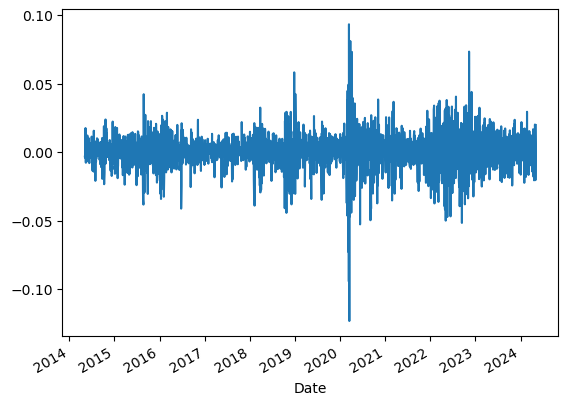

In [16]:
# Plot NASDAQ daily returns
df_nasdaq_daily_return.plot()

In [17]:
# Calculate average day of the week return
nasdaq_dow_return_grouped_mean = df_nasdaq_daily_return.groupby([df_nasdaq_daily_return.index.isocalendar().day])
nasdaq_dow_return_mean = nasdaq_dow_return_grouped_mean.mean()
nasdaq_dow_return_mean

day
1    0.000607
2    0.000674
3    0.000962
4    0.000408
5    0.000502
Name: NASDAQ Daily Return, dtype: float64

<Axes: xlabel='day'>

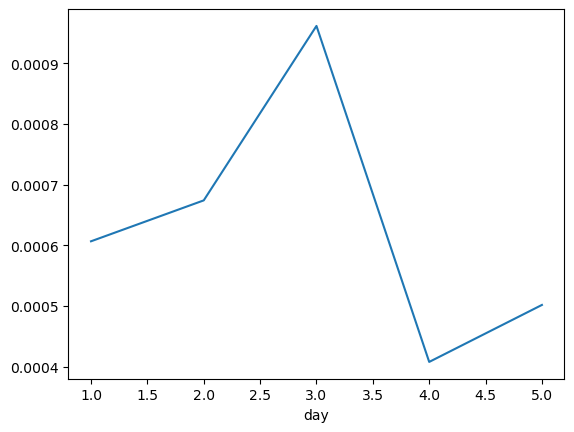

In [18]:
# Plot NASDAQ average day of week returns
nasdaq_dow_return_mean.plot()

In [19]:
# Calculate average day of the month return
nasdaq_dom_return_grouped_mean = df_nasdaq_daily_return.groupby([df_nasdaq_daily_return.index.day])
nasdaq_dom_return_mean = nasdaq_dom_return_grouped_mean.mean()
nasdaq_dom_return_mean

Date
1     0.002270
2     0.002085
3    -0.001571
4     0.002487
5    -0.000463
6     0.001003
7     0.000865
8     0.000768
9    -0.001225
10    0.001108
11   -0.001071
12    0.001054
13    0.000746
14    0.001204
15    0.002341
16    0.000252
17    0.001016
18    0.000027
19   -0.000428
20   -0.000270
21   -0.000024
22    0.000889
23    0.000439
24    0.000463
25    0.000370
26    0.002092
27   -0.000437
28    0.001689
29    0.001412
30    0.000380
31    0.000081
Name: NASDAQ Daily Return, dtype: float64

<Axes: xlabel='Date'>

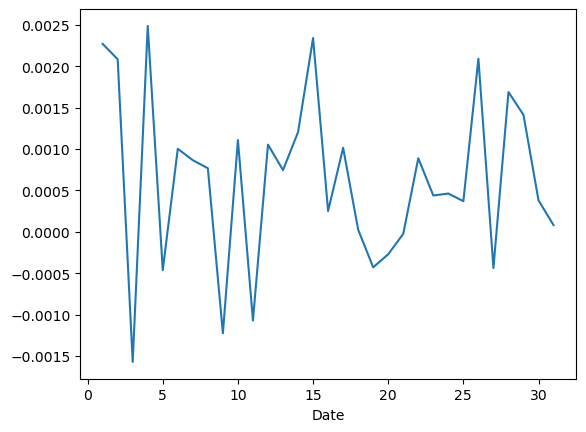

In [20]:
# Plot NASDAQ average day of month returns
nasdaq_dom_return_mean.plot()

In [21]:
# Calculate average week of the year return
nasdaq_woy_return_grouped_mean = df_nasdaq_daily_return.groupby([df_nasdaq_daily_return.index.isocalendar().week])
nasdaq_woy_return_mean = nasdaq_woy_return_grouped_mean.mean()
nasdaq_woy_return_mean

week
1    -0.001132
2     0.002034
3     0.001325
4     0.001786
5     0.000215
6     0.000394
7     0.003036
8    -0.000425
9    -0.001624
10   -0.000868
11    0.001421
12   -0.002465
13    0.004138
14   -0.001116
15    0.003167
16   -0.000701
17    0.001121
18   -0.000317
19    0.000070
20   -0.000214
21    0.004432
22    0.001264
23    0.000822
24   -0.001049
25    0.003510
26   -0.000646
27    0.003719
28    0.001782
29    0.002105
30    0.000926
31    0.000096
32    0.000199
33   -0.001016
34   -0.000332
35    0.003109
36   -0.002287
37   -0.000345
38   -0.001804
39   -0.001842
40    0.000466
41   -0.000478
42    0.001186
43    0.001512
44    0.000891
45    0.005155
46   -0.000164
47    0.000197
48    0.001877
49    0.000196
50   -0.001770
51    0.000436
52    0.001476
53   -0.000180
Name: NASDAQ Daily Return, dtype: float64

<Axes: xlabel='week'>

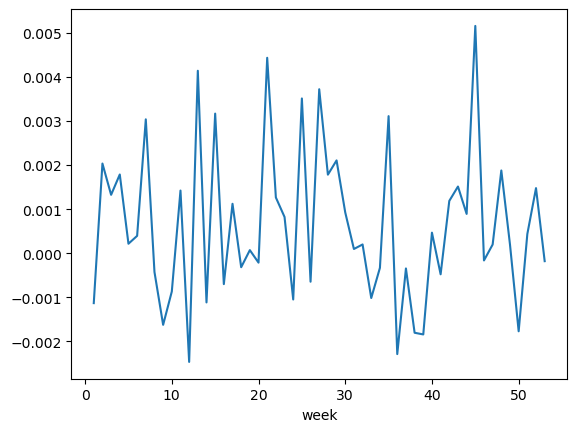

In [22]:
# Plot NASDAQ average week of year returns
nasdaq_woy_return_mean.plot()

In [23]:
# Create a column that contains the SP500 daily return data
# Use the pct_change function to calculate the daily return values
df_nasdaq_sp500_close['SP 500 Daily Return'] = df_nasdaq_sp500_close['SP500 Close'].pct_change()

In [24]:
df_nasdaq_sp500_close

,NASDAQ Close,SP500 Close,NASDAQ Daily Return,SP 500 Daily Return
Date,,,,
2014-05-06,4080.76,1867.72,NaN,NaN
2014-05-07,4067.67,1878.21,-0.003208,0.005616
2014-05-08,4051.50,1875.63,-0.003975,-0.001374
2014-05-09,4071.87,1878.48,0.005028,0.001519
2014-05-12,4143.86,1896.65,0.017680,0.009673
...,...,...,...,...
2024-04-29,15983.08,5116.17,0.003464,0.003178
2024-04-30,15657.82,5035.69,-0.020350,-0.015731
2024-05-01,15605.48,5018.39,-0.003343,-0.003435


In [25]:
# Create new df with just S&P 500 Daily Return
df_sp500_daily_return = df_nasdaq_sp500_close['SP 500 Daily Return']
df_sp500_daily_return

Date
2014-05-06         NaN
2014-05-07    0.005616
2014-05-08   -0.001374
2014-05-09    0.001519
2014-05-12    0.009673
                ...   
2024-04-29    0.003178
2024-04-30   -0.015731
2024-05-01   -0.003435
2024-05-02    0.009128
2024-05-03    0.012557
Name: SP 500 Daily Return, Length: 2531, dtype: float64

<Axes: xlabel='Date'>

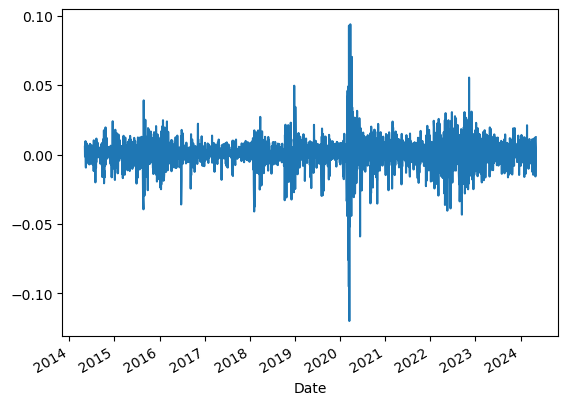

In [26]:
# Plot S&P 500 daily returns
df_sp500_daily_return.plot()

In [27]:
# Calculate average day of the week return
SP500_dow_return_grouped_mean = df_sp500_daily_return.groupby([df_sp500_daily_return.index.isocalendar().day])
SP500_dow_return_mean = SP500_dow_return_grouped_mean.mean()
SP500_dow_return_mean

day
1    0.000300
2    0.000457
3    0.000666
4    0.000288
5    0.000583
Name: SP 500 Daily Return, dtype: float64

<Axes: xlabel='day'>

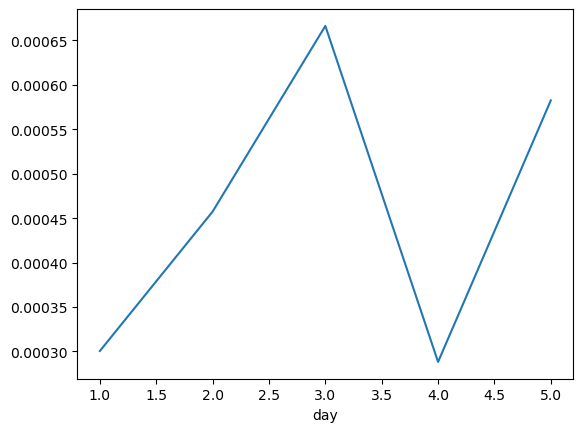

In [28]:
# Plot S&P 500 average day of week returns
SP500_dow_return_mean.plot()

In [29]:
# Calculate average day of the month return
SP500_dom_return_grouped_mean = df_sp500_daily_return.groupby([df_sp500_daily_return.index.day])
SP500_dom_return_mean = SP500_dom_return_grouped_mean.mean()
SP500_dom_return_mean

Date
1     0.001335
2     0.002135
3    -0.000111
4     0.002169
5     0.000082
6     0.001060
7     0.000698
8     0.001027
9    -0.001293
10    0.001403
11   -0.001738
12    0.000535
13    0.000235
14    0.000674
15    0.001833
16    0.000482
17    0.000687
18   -0.000302
19   -0.000791
20   -0.000932
21    0.000297
22    0.000545
23   -0.000156
24    0.000389
25    0.000603
26    0.001585
27   -0.000347
28    0.001327
29    0.001478
30    0.000371
31   -0.001573
Name: SP 500 Daily Return, dtype: float64

<Axes: xlabel='Date'>

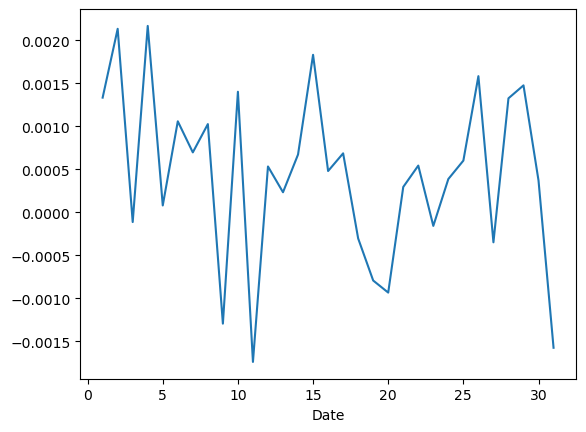

In [30]:
# Plot S&P 500 average day of month returns
SP500_dom_return_mean.plot()

In [31]:
# Calculate average week of the year return
SP500_woy_return_grouped_mean = df_sp500_daily_return.groupby([df_sp500_daily_return.index.isocalendar().week])
SP500_woy_return_mean = SP500_woy_return_grouped_mean.mean()
SP500_woy_return_mean

week
1    -0.000362
2     0.000982
3     0.000559
4     0.001334
5    -0.000198
6     0.000169
7     0.002439
8     0.000064
9    -0.001617
10   -0.000745
11    0.000245
12   -0.002909
13    0.004080
14   -0.000406
15    0.003170
16   -0.000423
17    0.000474
18    0.000120
19   -0.000040
20   -0.001007
21    0.003076
22    0.000818
23    0.001344
24   -0.002223
25    0.002415
26   -0.000103
27    0.002325
28    0.001318
29    0.001874
30    0.000913
31   -0.000505
32    0.000633
33   -0.000469
34   -0.001122
35    0.002076
36   -0.001641
37   -0.000555
38   -0.001005
39   -0.001961
40    0.000809
41    0.000085
42    0.001183
43    0.001035
44    0.000751
45    0.004447
46    0.000144
47    0.000494
48    0.002000
49    0.000352
50   -0.001904
51    0.000447
52    0.001537
53    0.000762
Name: SP 500 Daily Return, dtype: float64

<Axes: xlabel='week'>

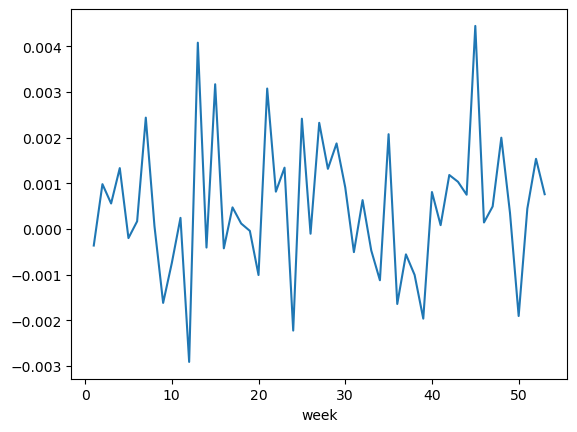

In [32]:
# Plot S&P 500 average week of year returns
SP500_woy_return_mean.plot()